#  [midterm project] EUA price prediction - A

# Correlation and covariance

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'NG (€/ton)')

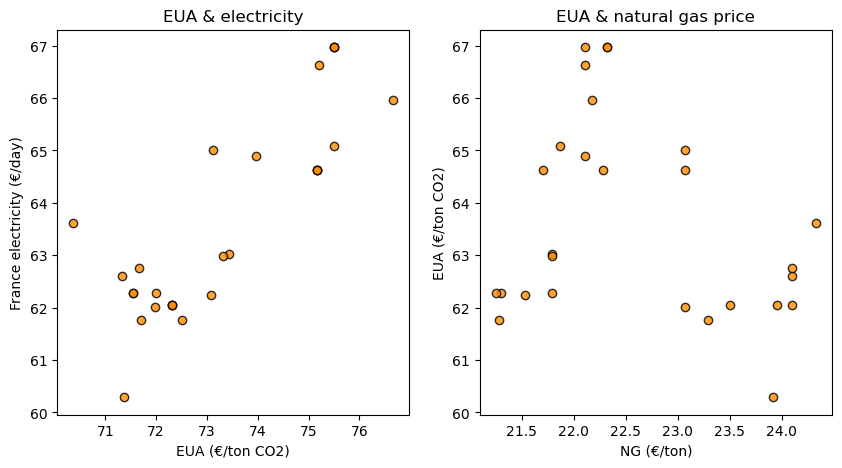

In [151]:
df = pd.read_csv('EUA & france electricity&NG.csv') # Summary Statistics for Tabular Data
df.describe()

plt.figure(figsize = (10,5)) # Bivariate Analysis
plt.subplot(121)
plt.plot(df['France electricity'].values,df['EUA'].values, 'o', label='', markerfacecolor='darkorange', markeredgecolor='black', alpha=0.8)
plt.title('EUA & electricity')
plt.xlabel('EUA (€/ton CO2)')
plt.ylabel('France electricity (€/day)')

plt.subplot(122)
plt.plot(df['NG'].values,df['EUA'].values, 'o', label='', markerfacecolor='darkorange', markeredgecolor='black', alpha=0.8)
plt.title('EUA & natural gas price')
plt.ylabel('EUA (€/ton CO2)')
plt.xlabel('NG (€/ton)')


In [152]:
df.iloc[:,1:].cov() # Covariance

,EUA,France electricity,NG
EUA,3.642656,2.807015,-0.514755
France electricity,2.807015,3.078525,-0.703697
NG,-0.514755,-0.703697,1.004749


In [153]:
df.iloc[:,1:].corr() # Correlation coefficient.

,EUA,France electricity,NG
EUA,1.000000,0.838232,-0.269068
France electricity,0.838232,1.000000,-0.400116
NG,-0.269068,-0.400116,1.000000


In [154]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True) # inf 값을 NaN으로 변경

df.dropna(subset=['EUA', 'France electricity', 'NG'], inplace=True) # NaN 값 제거

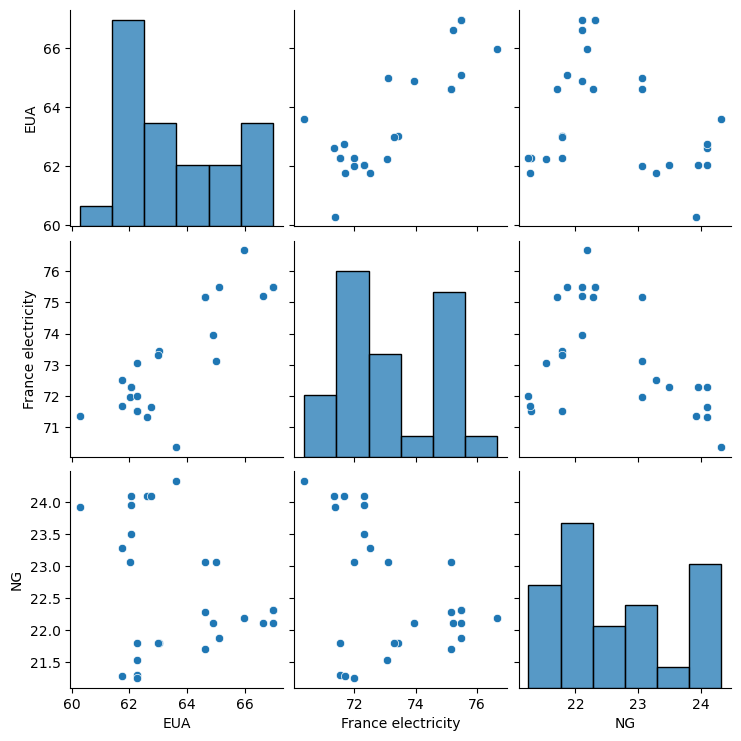

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=['EUA', 'France electricity', 'NG'])
plt.show()

# EUA Prediction

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [160]:
# !pip install sklearn

# 2023년 10월~11월 France electricity and EUA price

In [162]:
df = pd.read_csv('france electricity and EUA 20231001~20231129.csv')
df.head()
df = df.iloc[:60]  
print(df)

     Date  France    EUA
0   10/01  128.79  81.45
1   10/02  125.48  80.70
2   10/03  121.26  79.80
3   10/04  122.76  81.82
4   10/05  121.26  80.86
5   10/06  122.16  80.62
6   10/07  122.16  80.62
7   10/08  122.16  80.62
8   10/09  129.25  81.63
9   10/10  135.48  84.74
10  10/11  135.43  83.78
11  10/12  142.36  85.45
12  10/13  147.03  85.66
13  10/14  140.55  85.66
14  10/15  140.55  85.66
15  10/16  140.55  83.41
16  10/17  139.35  82.65
17  10/18  142.06  81.79
18  10/19  141.76  82.00
19  10/20  142.36  81.67
20  10/21  141.46  81.67
21  10/22  141.46  81.67
22  10/23  141.46  80.30
23  10/24  137.24  80.66
24  10/25  134.52  79.93
25  10/26  132.11  79.58
26  10/27  131.11  79.36
27  10/28  131.96  79.36
28  10/29  131.96  79.36
29  10/30  131.96  78.78
30  10/31  124.56  79.41
31  11/01  122.16  78.66
32  11/02  122.61  79.06
33  11/03  122.92  77.20
34  11/04  122.92  77.20
35  11/05  122.92  77.20
36  11/06  119.30  75.88
37  11/07  118.54  75.36
38  11/08  117.19  75.40


Text(0, 0.5, 'EUA(€/ton CO2), Electricity (€/day)')

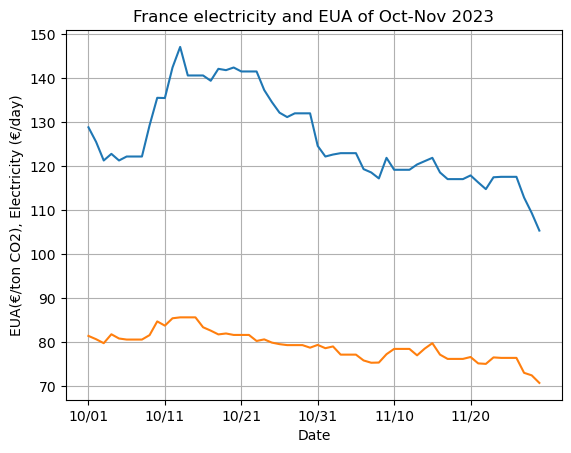

In [163]:
plt.plot(df['Date'], df['France'], df['EUA'])
plt.xticks(np.arange(0, 60, 10))
plt.title("France electricity and EUA of Oct-Nov 2023")  
plt.grid('on'); plt.xlabel('Date'); plt.ylabel('EUA(€/ton CO2), Electricity (€/day)')

# 2024년 10월 01~27일 EUA and France eletricity

In [165]:
df = pd.read_csv('5일치.csv')
df.head()
df = df.iloc[:27]  
print(df)

     Date   Value
0    10/1  70.364
1    10/2  71.333
2    10/3  71.657
3    10/4  72.303
4    10/5  72.303
5    10/6  72.303
6    10/7  72.505
7    10/8  71.374
8    10/9  71.980
9   10/10  73.111
10  10/11  75.170
11  10/12  75.170
12  10/13  75.170
13  10/14  76.667
14  10/15  75.495
15  10/16  73.434
16  10/17  73.313
17  10/18  71.535
18  10/19  71.535
19  10/20  72.000
20  10/21  71.697
21  10/22  73.071
22  10/23  73.960
23  10/24  75.212
24  10/25  75.495
25  10/26  75.495
26  10/27  75.495


In [166]:
df.describe()

,Value
count,27.000000
mean,73.301741
std,1.754573
min,70.364000
25%,71.838500
50%,73.071000
75%,75.170000
max,76.667000


Text(0, 0.5, 'Fance eletircity (€/day)')

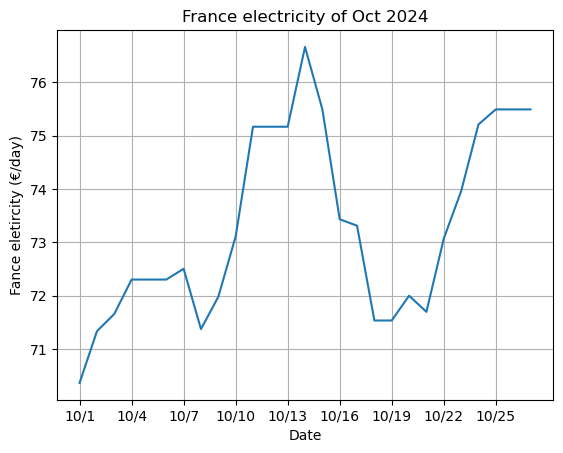

In [167]:
plt.plot(df['Date'], df['Value'])
plt.xticks(np.arange(0, 27, 3))
plt.title("France electricity of Oct 2024")  # 그래프 제목 추가
plt.grid('on'); plt.xlabel('Date'); plt.ylabel('Fance eletircity (€/day)')

# 2024년 EUA 가격

In [169]:
df = pd.read_csv('EUA.csv')
df.head()
df = df.iloc[:27]  
print(df)

     Date  Value  Unnamed: 2  EUA
0   10-01  63.61         NaN  NaN
1   10-02  62.60         NaN  NaN
2   10-03  62.76         NaN  NaN
3   10-04  62.05         NaN  NaN
4   10-05  62.05         NaN  NaN
5   10-06  62.05         NaN  NaN
6   10-07  61.76         NaN  NaN
7   10-08  60.29         NaN  NaN
8   10-09  62.01         NaN  NaN
9   10-10  65.00         NaN  NaN
10  10-11  64.62         NaN  NaN
11  10-12  64.62         NaN  NaN
12  10-13  64.62         NaN  NaN
13  10-14  65.97         NaN  NaN
14  10-15  65.09         NaN  NaN
15  10-16  63.03         NaN  NaN
16  10-17  62.98         NaN  NaN
17  10-18  62.28         NaN  NaN
18  10-19  62.28         NaN  NaN
19  10-20  62.28         NaN  NaN
20  10-21  61.76         NaN  NaN
21  10-22  62.25         NaN  NaN
22  10-23  64.89         NaN  NaN
23  10-24  66.63         NaN  NaN
24  10-25  66.97         NaN  NaN
25  10-26  66.97         NaN  NaN
26  10-27  66.97         NaN  NaN


In [170]:
df.describe()

,Value,Unnamed: 2,EUA
count,27.000000,0.0,0.0
mean,63.644074,NaN,NaN
std,1.908574,NaN,NaN
min,60.290000,NaN,NaN
25%,62.150000,NaN,NaN
50%,62.980000,NaN,NaN
75%,64.945000,NaN,NaN
max,66.970000,NaN,NaN


Text(0, 0.5, 'EUA (€/ton CO2)')

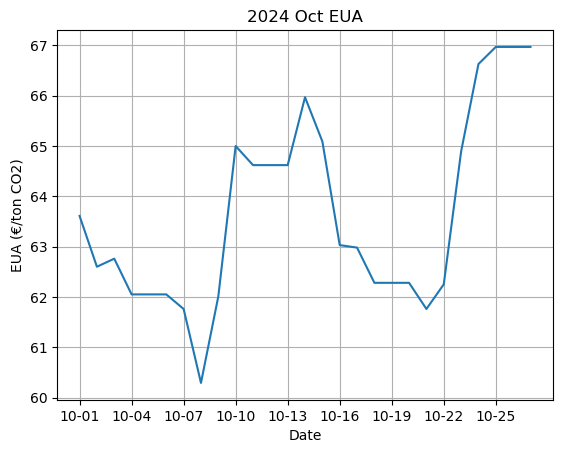

In [171]:
plt.plot(df['Date'], df['Value'])
plt.xticks(np.arange(0, 27, 3))
plt.title("2024 Oct EUA")  
plt.grid('on'); plt.xlabel('Date'); plt.ylabel('EUA (€/ton CO2)')

In [172]:
df = pd.read_csv('EUA & france electricity.csv')
df.head()
df = df.iloc[:27]  
print(df)

     Date    EUA  France electricity
0   10/01  63.61              70.364
1   10/02  62.60              71.333
2   10/03  62.76              71.657
3   10/04  62.05              72.303
4   10/05  62.05              72.303
5   10/06  62.05              72.303
6   10/07  61.76              72.505
7   10/08  60.29              71.374
8   10/09  62.01              71.980
9   10/10  65.00              73.111
10  10/11  64.62              75.170
11  10/12  64.62              75.170
12  10/13  64.62              75.170
13  10/14  65.97              76.667
14  10/15  65.09              75.495
15  10/16  63.03              73.434
16  10/17  62.98              73.313
17  10/18  62.28              71.535
18  10/19  62.28              71.535
19  10/20  62.28              72.000
20  10/21  61.76              71.697
21  10/22  62.25              73.071
22  10/23  64.89              73.960
23  10/24  66.63              75.212
24  10/25  66.97              75.495
25  10/26  66.97              75.495
2

Text(0, 0.5, 'EUA (€/ton CO2)')

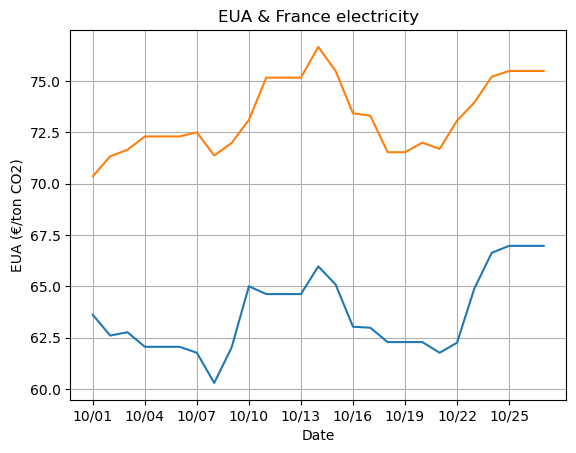

In [173]:
plt.plot(df['Date'], df['EUA'], df['France electricity'])
plt.xticks(np.arange(0, 27, 3))
plt.title("EUA & France electricity") 
plt.grid('on'); plt.xlabel('Date'); plt.ylabel('EUA (€/ton CO2)')

# DATA 표준화

In [175]:
# instantiate scaler
scaler = StandardScaler()
eua_scaler = StandardScaler()

# apply then transform the data
standardized_data = scaler.fit_transform(df.iloc[:, 1:])

# just fit to EUA only for the later use
eua_scaler.fit(df.iloc[:, 1].values.reshape(-1,1))

# check dimension and first 5 values
print(standardized_data.shape)
print(standardized_data[0:5])


(27, 2)
[[-0.01819325 -1.70622895]
 [-0.5574648  -1.14343734]
 [-0.47203564 -0.95525934]
 [-0.85112753 -0.58006493]
 [-0.85112753 -0.58006493]]


# linear regression

linear regression 과 KNeighborsRegresion 을 수행하였을 때, linear가 더 적합하다고 판단하여 linear regression 사용

In [178]:
time_window = 7
X = []
y = []
for i in range(len(standardized_data) - time_window):
    X.append(standardized_data[i:i+time_window,:].flatten()) # last days EUA, marketsize, ... etc
    y.append(standardized_data[i+time_window,  0]) # next day EUA
X = np.array(X)
y = np.array(y).reshape(-1,1)

print(f'dimension of X is {X.shape}')
print(f'dimension of X is {y.shape}')

dimension of X is (20, 14)
dimension of X is (20, 1)


In [179]:
# Split the data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Instantiate the Linear Regressor
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [180]:
# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance metrics for training data
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# Evaluate performance metrics for testing data
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)


# Print the results
print(f"Training Data Performance:")
print(f"R²: {train_r2:.4f}")
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")

print(f"\nTesting Data Performance:")
print(f"R²: {test_r2:.4f}")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")


Training Data Performance:
R²: 0.9332
MSE: 0.0584
RMSE: 0.2417

Testing Data Performance:
R²: -0.5407
MSE: 4.8997
RMSE: 2.2135


# accuracy plot

In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('EUA for regression.csv') 

In [183]:
# Fit the model to the training data
model = LinearRegression()

# Instantiate the Linear Regressor
model.fit(X_train, y_train)

LinearRegression()

In [184]:
from sklearn.neighbors import KNeighborsRegressor
# Instantiate the KNN Regressor
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed
# Fit the model to the training data
model.fit(X_train, y_train)


KNeighborsRegressor()

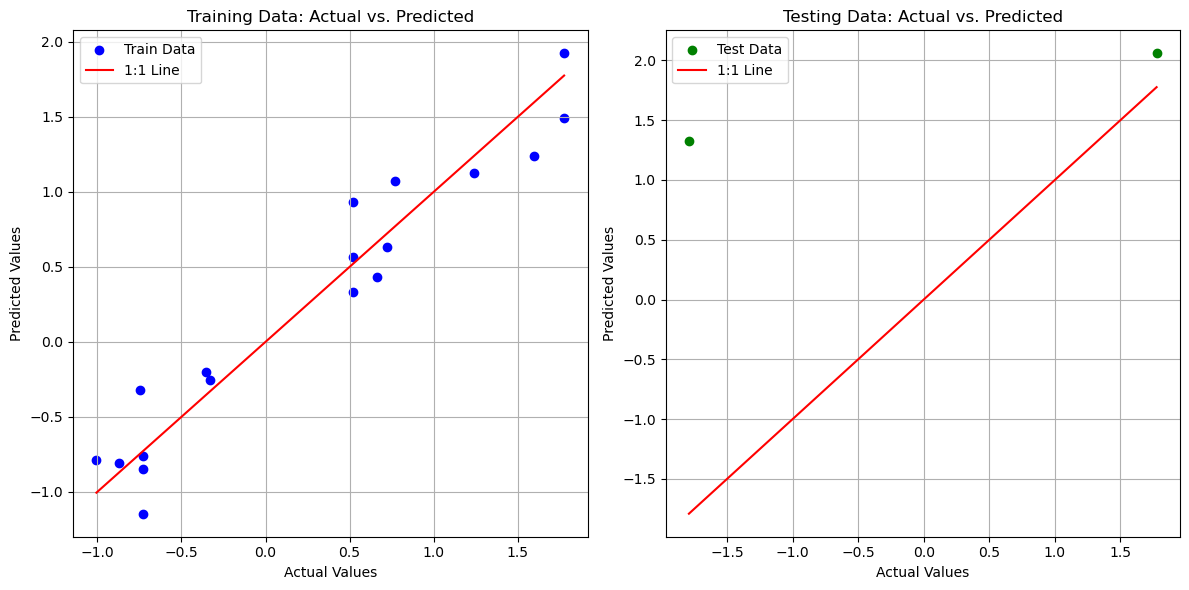

In [185]:
plt.figure(figsize=(12, 6))

# Subplot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='1:1 Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Data: Actual vs. Predicted')
plt.legend()
plt.grid(True)

# Subplot for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='1:1 Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Testing Data: Actual vs. Predicted')
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# 10/28~11/3 까지 EUA 가격예측

C:\Users\gram\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gram\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gram\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gram\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


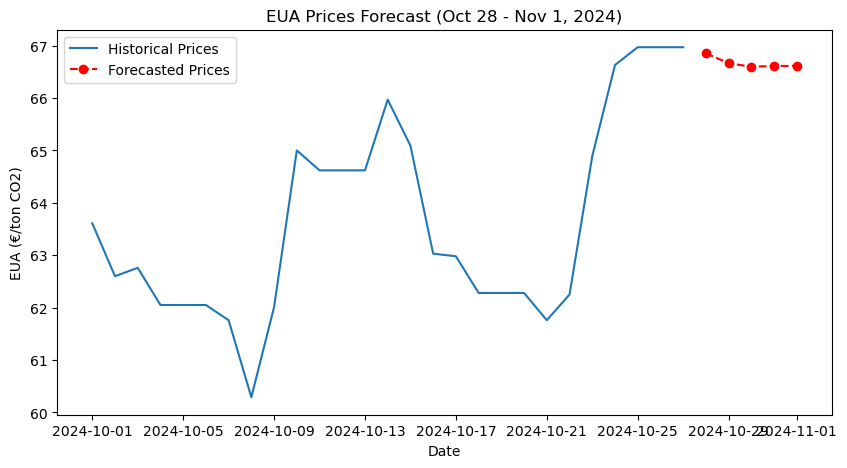

Date: 2024-10-28, Predicted Price: 66.85
Date: 2024-10-29, Predicted Price: 66.67
Date: 2024-10-30, Predicted Price: 66.60
Date: 2024-10-31, Predicted Price: 66.61
Date: 2024-11-01, Predicted Price: 66.61


In [187]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

file_path = 'EUA.csv'
data = pd.read_csv(file_path)

data['Value'] = pd.to_numeric(data['Value'], errors='coerce') 
data.dropna(subset=['Value'], inplace=True)  

data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: f'2024-{x}'), format='%Y-%m-%d')
data = data.set_index('Date')

model = ARIMA(data['Value'], order=(5, 1, 0)) #모델 학습 (ARIMA 사용)
model_fit = model.fit()

forecast = model_fit.predict(start=len(data), end=len(data) + 4, typ='levels') # 데이터 예측

forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=5)
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Value'], label='Historical Prices')
plt.plot(forecast_dates, forecast, color='red', marker='o', linestyle='dashed', label='Forecasted Prices')
plt.title('EUA Prices Forecast (Oct 28 - Nov 1, 2024)')
plt.xlabel('Date')
plt.ylabel('EUA (€/ton CO2)')
plt.legend()
plt.show()

for date, price in zip(forecast_dates, forecast):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Predicted Price: {price:.2f}")


 # 10/28~11/3 가격 평균 내기

In [189]:
import pandas as pd

predicted_data = {
    "Date": ["2024-10-28", "2024-10-29", "2024-10-30", "2024-10-31", "2024-11-01"],
    "Predicted Price": [66.85, 66.67, 66.60, 66.61, 66.61]
}

df = pd.DataFrame(predicted_data)

average_price = df["Predicted Price"].mean()

print(f"평균 예측 가격: {average_price:.2f} 유로")


평균 예측 가격: 66.67 유로
